# Pymaceuticals Inc.
---

### Analysis
* Your analysis here ...

In [321]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
# import scipy.stats as st
import numpy as np
from scipy.stats import linregress
# %matplotlib notebook

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(study_results_path)
study_results = pd.read_csv(mouse_metadata_path)

# Combine the data into a single dataset
combined_studymouse_data = pd.merge(mouse_metadata, study_results,how = 'left',on="Mouse ID")

# Display the data table for preview
combined_studymouse_data.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [322]:
# Checking the number of mice.
uniquemices=combined_studymouse_data.loc[:, ["Mouse ID"]]
uniquemices=uniquemices.drop_duplicates()
TotalNumberOfMices=uniquemices.count()
TotalNumberOfMices

Mouse ID    249
dtype: int64

In [323]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice=combined_studymouse_data.loc[combined_studymouse_data.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
dup_mice

array(['g989'], dtype=object)

In [324]:
# Optional: Get all the data for the duplicate mouse ID. 
Dupmiceid_AllData=combined_studymouse_data[combined_studymouse_data["Mouse ID"]== 'g989'] 
Dupmiceid_AllData

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [345]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df=combined_studymouse_data[combined_studymouse_data["Mouse ID"].isin(dup_mice) == False]
cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [326]:
# Checking the number of mice in the clean DataFrame.
# Nofmice=cleandf.loc[:, ["Mouse ID"]]
clean_mice=cleaned_df["Mouse ID"].value_counts()
clean_number_of_mice=len(clean_mice)
clean_number_of_mice

248

## Summary Statistics

In [327]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
grpbyDrugRegimen=combined_studymouse_data.groupby(["Drug Regimen"])
Mean_Tumor_volume =grpbyDrugRegimen.mean()["Tumor Volume (mm3)"]
Median_Tumor_Volume=grpbyDrugRegimen.median()["Tumor Volume (mm3)"]
var_numpy = grpbyDrugRegimen.var()["Tumor Volume (mm3)"]
sd_numpy = grpbyDrugRegimen.std()["Tumor Volume (mm3)"]
sem_numpy =grpbyDrugRegimen.sem()["Tumor Volume (mm3)"]
# print(f"The population standard deviation using the NumPy module is {sd_numpy}")
Summary_Statistics=pd.DataFrame({"Mean Tumor Volume": Mean_Tumor_volume,
                                   "Median Tumor Volume": Median_Tumor_Volume,
                                    "Tumor Volume Variance": var_numpy,
                                   "Tumor Volume Std. Dev.":sd_numpy,
                                   "Tumor Volume Std. Err.": sem_numpy})
Summary_Statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [328]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
Summary_Statistics_oneline = grpbyDrugRegimen.agg(['mean','median','var','std','sem'])
Summary_Statistics_oneline_Result=Summary_Statistics_oneline["Tumor Volume (mm3)"]
Summary_Statistics_oneline_Result

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [329]:
#Number of unique mice to be tested
micetested =cleaned_df["Drug Regimen"].value_counts()
micetested

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

Text(0, 0.5, 'Number of Unique Mice Tested')

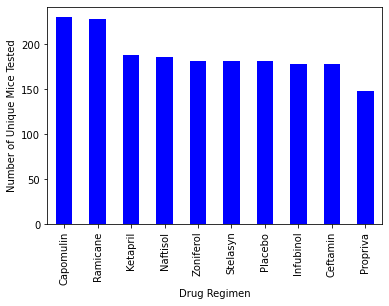

In [330]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
y_axis = micetested.values
x_axis = np.arange(len(micetested))
x_axis=micetested.index
micetested.plot(kind="bar",color='b')
# Give our chart some labels and a tile
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice Tested")

Text(0, 0.5, 'Number of Unique Mice Tested')

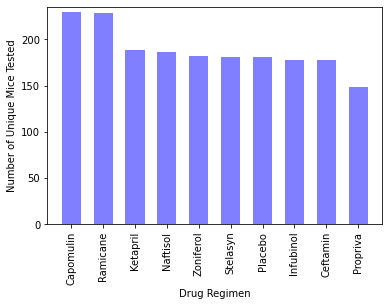

In [331]:
# Generate a bar plot showing the total number of unqiue mice tested on each drug regimen using using pyplot.
y_axis = micetested.values
x_axis = np.arange(len(micetested))
x_axis=micetested.index
plt.bar(x_axis, y_axis, color='b', alpha=0.5, align="center", width =.6 )
plt.xticks(rotation='vertical')
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(y_axis)+5)
# Give our chart some labels and a tile
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice Tested")

In [332]:
#Gender Count
gendercomparison =cleaned_df["Sex"].value_counts()
gendercomparison.values

array([958, 922], dtype=int64)

Text(0, 0.5, 'Sex')

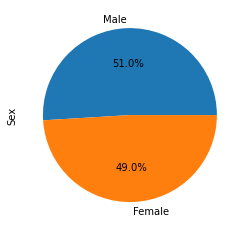

In [333]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gendercomparison.plot(kind='pie',autopct="%1.1f%%" )
# Give our chart some labels and a tile
plt.ylabel("Sex")

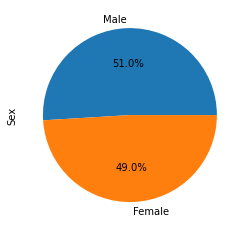

In [334]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Labels for the sections of our pie chart
labels = gendercomparison.index
# The values of each section of the pie chart
sizes = gendercomparison.values
plt.pie(sizes,labels=labels,autopct="%1.1f%%", shadow=False)
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [335]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

In [346]:
# create new df for each Drug Regimen
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Capomulindf=combined_studymouse_data.loc[combined_studymouse_data["Drug Regimen"]=="Capomulin",:]
Capomulindf=Capomulindf.groupby("Mouse ID").max()['Timepoint']
Capomulindfmerge =pd.merge(Capomulindf, combined_studymouse_data, on=("Mouse ID","Timepoint"),how="left")

Ramicanedf=combined_studymouse_data.loc[combined_studymouse_data["Drug Regimen"]=="Ramicane",:]
Ramicanedf=Ramicanedf.groupby("Mouse ID").max()['Timepoint']
Ramicanedfmerge =pd.merge(Ramicanedf, combined_studymouse_data, on=("Mouse ID","Timepoint"),how="left")

Infubinoldf=combined_studymouse_data.loc[combined_studymouse_data["Drug Regimen"]=="Infubinol",:]
Infubinoldf=Infubinoldf.groupby("Mouse ID").max()['Timepoint']
Infubinoldfmerge =pd.merge(Infubinoldf, combined_studymouse_data, on=("Mouse ID","Timepoint"),how="left")

Ceftamindf=combined_studymouse_data.loc[combined_studymouse_data["Drug Regimen"]=="Ceftamin",:]
Ceftamindf=Ceftamindf.groupby("Mouse ID").max()['Timepoint']
Ceftamindfmerge =pd.merge(Ceftamindf, combined_studymouse_data, on=("Mouse ID","Timepoint"),how="left")

In [337]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Determine outliers using upper and lower bounds
Capomulintumorvol = Capomulindfmerge["Tumor Volume (mm3)"]
quartiles = Capomulintumorvol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

Ramicanetumorvol = Ramicanedfmerge["Tumor Volume (mm3)"]
quartiles = Ramicanetumorvol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound1 = lowerq - (1.5*iqr)
upper_bound1 = upperq + (1.5*iqr)


Infubinoltumorvol = Infubinoldfmerge["Tumor Volume (mm3)"]
quartiles = Infubinoltumorvol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound2 = lowerq - (1.5*iqr)
upper_bound2 = upperq + (1.5*iqr)


Ceftamintumorvol = Ceftamindfmerge["Tumor Volume (mm3)"]
quartiles = Ceftamintumorvol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound3 = lowerq - (1.5*iqr)
upper_bound3 = upperq + (1.5*iqr)

print(f"Capomulin potential outliers could be values below {lower_bound} and above {upper_bound} could be outliers.")
print(f"Ramicane potential outliers could be values below {lower_bound1} and above {upper_bound1} could be outliers.")
print(f"Infubinol potential outliers could be values below {lower_bound2} and above {upper_bound2} could be outliers.")
print(f"Ceftamin potential outliers could be values below {lower_bound3} and above {upper_bound3} could be outliers.")

Capomulin potential outliers could be values below 20.70456164999999 and above 51.83201549 could be outliers.
Ramicane potential outliers could be values below 17.912664470000003 and above 54.30681135 could be outliers.
Infubinol potential outliers could be values below 36.83290494999999 and above 82.74144559000001 could be outliers.
Ceftamin potential outliers could be values below 25.355449580000002 and above 87.66645829999999 could be outliers.


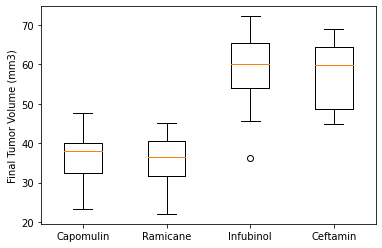

In [338]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data_to_plot = [Capomulintumorvol,Ramicanetumorvol,Infubinoltumorvol,Ceftamintumorvol]

fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')

ax1.boxplot(data_to_plot, labels=["Capomulin","Ramicane","Infubinol","Ceftamin",])

plt.savefig('boxplot')
plt.show()

## Line and Scatter Plots

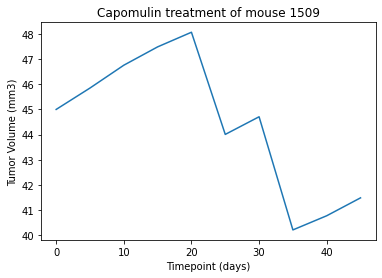

In [339]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Specificmice= cleaned_df.loc[cleaned_df['Mouse ID'] == 'l509']
plt.plot(Specificmice["Timepoint"], Specificmice["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse 1509")
plt.show()

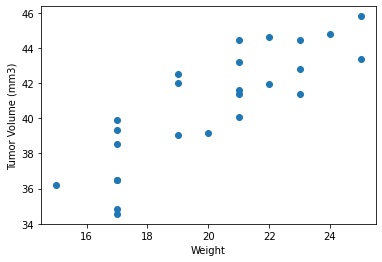

In [340]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
weight= cleaned_df.loc[cleaned_df['Drug Regimen'] == 'Capomulin']
AvgValues=weight.groupby(["Mouse ID"]).mean()
# AvgValues
plt.scatter(AvgValues["Weight (g)"],AvgValues["Tumor Volume (mm3)"] )
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [341]:
# Calculate the correlation coefficient and linear regression model 
weightcor = AvgValues.iloc[:,4]
volumecorr = AvgValues.iloc[:,1]
correlation = st.pearsonr(income,alcohol)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

The correlation between mouse weight and the average tumor volume is 0.84


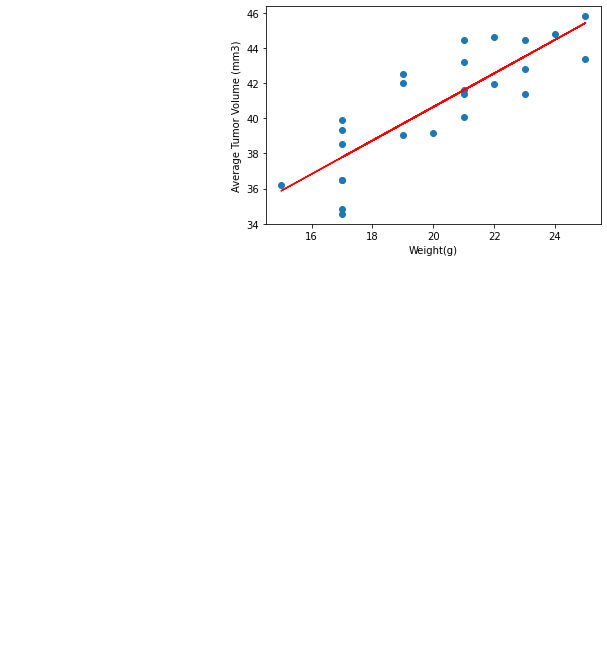

In [344]:
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = AvgValues["Weight (g)"]
y_values = AvgValues["Tumor Volume (mm3)"]
# linregress(x_values,y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()